# Framework for the Market Simulation:

**Agent Types:** 
- Impulsive Agent: Buys items more frequently and is less sensitive to price changes.
- Neutral Agent: Buys items at a moderate frequency and has a moderate sensitivity to price changes.
- Conservative Agent: Buys items infrequently and is highly sensitive to price changes.

**Market Setup:**

- A fixed number of items are available for purchase.
- Each item has a base price, which may fluctuate slightly during the simulation.

**Agent Rules:**

- Buying Frequency: Impulsive > Neutral > Conservative.
- Price Sensitivity: Conservative > Neutral > Impulsive.
- Each agent type decides whether to buy an item based on its price and their buying behavior.

**Simulation Process:**

- The market operates in discrete time steps.
- At each time step, each agent decides whether to buy an item based on their type and the current item price.
- Prices can fluctuate each time step, influencing the agents' decisions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Define the agent types
class Agent:
    def __init__(self, type, sensitivity, frequency):
        self.type = type
        self.sensitivity = sensitivity
        self.frequency = frequency
        self.purchase_history = []

    def decide_to_buy(self, price):
        # The decision to buy is based on sensitivity to price and a random factor based on frequency
        return random.random() < self.frequency / price ** self.sensitivity

In [4]:
# Initialize agents
num_agents = 30
agents = []
for _ in range(num_agents // 3):
    agents.append(Agent("Impulsive", sensitivity=0.5, frequency=0.9))  # Impulsive agents
    agents.append(Agent("Neutral", sensitivity=1.0, frequency=0.6))     # Neutral agents
    agents.append(Agent("Conservative", sensitivity=1.5, frequency=0.3)) # Conservative agents

In [5]:
# Market simulation
num_steps = 100
base_price = 10
price_fluctuation = 2
total_purchases = []

for step in range(num_steps):
    current_price = base_price + random.uniform(-price_fluctuation, price_fluctuation)
    purchases = 0
    for agent in agents:
        if agent.decide_to_buy(current_price):
            purchases += 1
            agent.purchase_history.append(current_price)
    total_purchases.append(purchases)

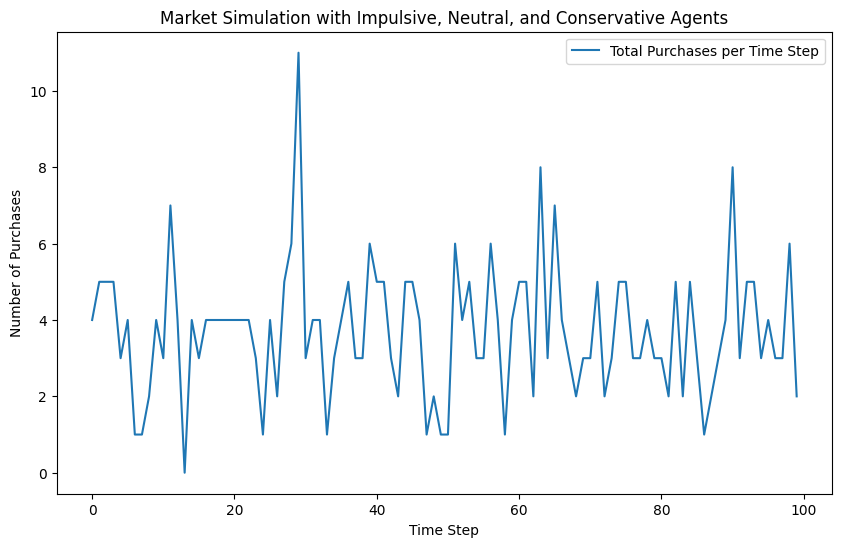

In [6]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(total_purchases, label='Total Purchases per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Number of Purchases')
plt.title('Market Simulation with Impulsive, Neutral, and Conservative Agents')
plt.legend()
plt.show()

**Key Aspects of the Simulation:**

**Agent Behavior:**

- Impulsive Agents: High purchase frequency and low price sensitivity.
- Neutral Agents: Moderate purchase frequency and moderate price sensitivity.
- Conservative Agents: Low purchase frequency and high price sensitivity.

**Market Dynamics:**

- The item price fluctuates slightly around a base price at each time step.
- Agents decide whether to buy an item based on their type and the current item price.

**Result Visualization:**

- The plot shows the total number of purchases per time step.
- Peaks indicate time steps where more purchases occurred, which might be due to favorable prices or random decision factors.

**Interpretation of Results:**

- The graph illustrates how the market activity fluctuates over time.
- The variability in the number of purchases per time step reflects the combined effects of price fluctuations and the diverse buying behaviors of the agents.
- Periods with higher purchases could indicate moments when the price was particularly appealing to many agents or when the random factors aligned to encourage buying.